# **3장 회귀 알고리즘과 모델 규제** 

1. **회귀(regression)** : 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제 


2. **K-최근접 이웃분류 vs k-최근접 이웃 회**귀: k-최근접 이웃알고리즘을 사용해 각각 분류 문제와 회귀 문제를 해결하는 방법
 - k-최근접 이웃 분류: 최근접 이웃 네모 2개, 세모 1개 따라서 x의 클래스는 네모
 - k-최근접 이웃 회귀: 최근접 이웃은 100, 80, 60 따라서 x는 (100 + 80 + 60)/3 = 80


3. **결정 계수(R², coefficient of determination)**: 회귀 모델에서 예측의 적합도를 0과 1 사이의 값으로 계산한 것으로 1에 가까울 수록 완벽함
  - R² = 1- ((타깃-예측)²/(타깃-평균)²)


4. **과대적합(overfitting) vs 과소적합(underfitting)**: 
 - 과대적합: 모델의 훈련 세트 점수가 테스트 세트 점수보다 훨씬 높은 경우
 - 과소적합: 모델의 훈련세트와 테스트 세트 점수가 모두 동일하게 낮거나 테스트 세트 성능이 오히려 더 높을 경우


5. **선형회귀(linear regression)**: 널리 사용되는 대표적인 회귀 알고리즘으로 feature가 하나인 경우 어떤 직선을 학습하는 알고리즘

6. **가중치(또는 계수, weight 또는 coefficient)**: 선형 회귀가 학습한 직선의 기울기를 종종 가중치 또는 계수라 함.

7. **다항 회귀(polynomial regression)**: 다항식을 사용하여 feature와 타깃 사이의 관계를 나타낸 선형 회귀

8. **다중 회귀(multiple regression)**: 여러 개의 feature을 사용한 선형 회귀

9. **변환기(transformer)**: feature를 만들거나 전처리하는 사이킷런의 클래스. 타깃 데이터 없이 입력 데이터를 변환함

In [1]:
# 03-1 회귀 문제 다루기_K-최근접 이웃 회귀

## 데이터 준비

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 2.5, 
                        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0,])

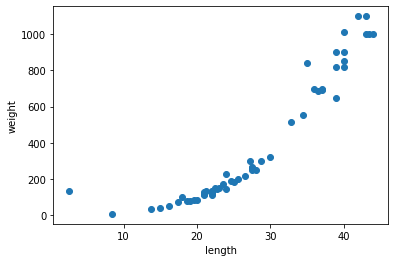

In [2]:
import matplotlib.pyplot as plt         # 데이터가 어떤 형태를 띠는지 산점도로 표시!
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split  # 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) # 책과 동일한 결과를 유지하기 위해 랜덤스테이트 유지


In [4]:
# 사이킷런에서 사용할 훈련세트는 2차원 배열, 현재 훈련,테스트 세트는 1차원 배열이므로 변경

train_input = train_input.reshape(-1, 1)  # reshape( )는 배열의 크기를 지정, 크기에 -1을 지정하면 나머지 원소 개수로 모두 채워라!!
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
## 결정계수(R^2)

# 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스_KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor 
knr = KNeighborsRegressor()
 
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target)) # 테스트 점수를 확인해보자! 값은 정확도. 정답을 맞힌 개수의 비율 

0.9893480173587588


In [6]:
# 타깃과 예측한 값 사이의 차이를 구해 보면 예측에 얼마나 벗어났는지 가늠하기 좋다!
# 결과는 타깃값과 얼마나 다른지 알 수 있다.

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산함
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

23.72857142857143


In [7]:
## 과대적합 vs 과소적합
# 앞에서 훈련한 모델을 사용해 훈련 세트의 R^2 점수를 확인
print(knr.score(train_input, train_target))

# 훈련세트보다 테스트 세트(0.9893480173587588)의 점수가 높으니 과소적합!

0.9698823289099255


In [8]:
# 과소적합은 모델을 조금 더 복잡하게 만들면 해결이 됩니다!
# k-최근접 이웃 알고리즘 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이기

# 이웃의 개수는 기본 5로 설정되어있는데 3으로 변경
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

# k값을 줄였더니 훈련 세트의 R^2 점수가 높아졌다! 0.9698823289099255 -> 0.9804899950518966

0.9804899950518966


In [9]:
# 테스트 세트의 점수를 확인
print(knr.score(test_input, test_target))

# 과소적합을 해결
# 훈련 세트의 점수 0.9804899950518966 , 테스트 세트의 점수 0.9699093591724484

0.9699093591724484


In [10]:
# 03-2 선형 회귀

## k-최근접 이웃의 한계

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 2.5, 
                        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])


In [11]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input,  test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련함
knr.fit(train_input, train_target)

print(knr.predict([[50]]))    # 50cm의 농어의 무게를 1,033g 정도로 예측했으나 실제는 훨씬 더 많이 나간다!! 뭐가 문제일까

[1033.33333333]


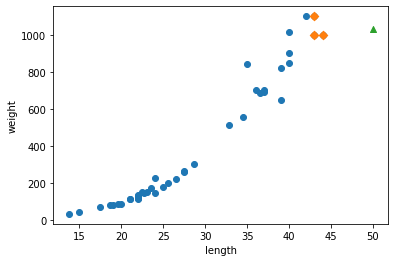

In [12]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()                      # 50cm 농어의 가장 가까운 것은 45cm 근방이기 떄문에 주볁 샘플들의 무게를 평균하면 실제 값과 차이 존재

In [13]:
# 이웃샘플의 타깃의 평균을 구해보자!

print(np.mean(train_target[indexes]))   # 모델이 예측한 값과 일치. 가장 가까운 샘플을 찾아 타깃을 예측하면 엉뚱한 값을 예측할 수 있음

1033.3333333333333


In [14]:
# 예를 들어 길이가 100cm 농어도 아마도 1,033g으로 예측할 것으로 추측됨

print(knr.predict([[100]]))

[1033.33333333]


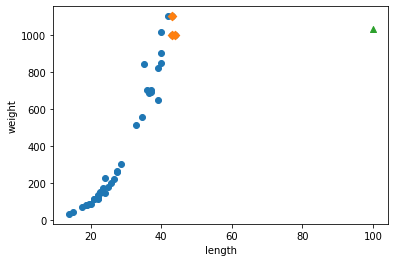

In [15]:
# 그래프로 그려서 확인해보자
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()                        # 이런 식이면 농어가 아무리 커도 무게가 더 늘어나지 않는다!  

In [16]:
## 선형 회귀_ 직선을 학습하는 알고리즘

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


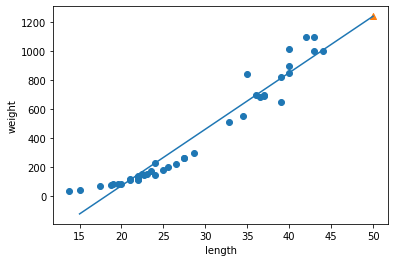

In [17]:
#농어의 길이 15에서 50까지 직선으로 그려서 그림으로 보자!

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그림
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 길이가 50cm인 농어의 예측이 직선의 연장선에 있다는 것을 알 수 있음.

In [18]:
# 훈련 세트와 테스트 세트에 대한 R^2점수를 확인
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target))   # 테스트 세트

0.9398463339976039
0.43457858577234654


In [19]:
# 직선대로 예측하면 농어의 무게가 0g 이하인 -까지 내려갈텐데 현실에서는 있을수 없다!
# -가 아닌 곡선에 가까우므로 최적의 곡선을 찾는게 보다 현실적이다!

## 다항 회귀_ 2차방정식의 그래프를 그리려면 제곱한 항이 훈련세트에 추가
# 농어의 길이를 제곱하여 데이터 앞에 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

# 모든 원소를 제곱하여 데이터 셋의 크기를 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [20]:
# 선형회귀 모델을 훈련한 다음 50cm 농어에 대해 무게 예측 
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))    # 앞서 훈련한 모델보다 더 높은 값을 예측함 

[1573.98423528]


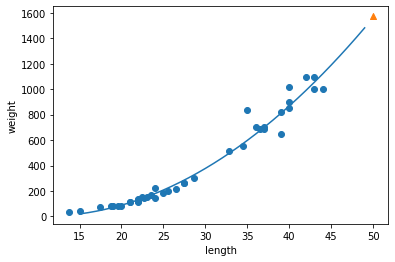

In [21]:
#다항회귀의 산점도 그래프를 그려서 눈으로 확인해보자! 

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt. scatter([50], [1574], marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [22]:
# 훈련 세트와 테스트 세트의 R^2 점수를 평가해보자
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))   # 과소적합이 남아있으므로 조금 더 복잡한 모델이 필요함.

0.9706807451768623
0.9750511657269735


In [23]:
# 03-3 특성 공학과 규제

# 조금더 복잡한 모델을 만드려면 제곱보다 더 고차항을 넣어야 하는데 특징을 추가해서 고차항으로 만들자
# 특성 공학 - 기존의 특성을 사용해 새로운 특성을 뽑아내 특징을 추가

## 데이터 준비
import pandas as pd     # pd는 관례적으로 사용하는 판다스의 별칭
df = pd.read_csv('http://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])




[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [24]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [25]:
## 사이킷런의 변환기_ 특성을 만들거나 전처리하기 위한 다양한 클래스 제공
from sklearn.preprocessing import PolynomialFeatures

# 예시1
poly = PolynomialFeatures()
poly.fit([[2, 3]])               # 훈련 fit을 해야 변환 transform이 가능함 
print(poly.transform([[2, 3]]))   # 1은 절편에 곱해진 수

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# 예시2
poly = PolynomialFeatures(include_bias=False) # 사이킷 런 선형모델은 자동 절편을 추가하므로 제거 
poly.fit([[2,3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [26]:
# 특성 만들기를 적용, 배열의 크기를 확인_9개의 특성
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
# 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는가
poly.get_feature_names()


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [27]:
# 테스트 세트로 변환하여 다중 회귀 모델을 훈련하자
test_poly = poly.transform(test_input)

In [28]:
## 다중 회귀 모델 훈련하기

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))   # 특성이 늘어나면 선형 회귀의 능력은 아주 강력하다


0.9903183436982124


In [ ]:
#테스트 세트에 대한 점수도 확인
print(lr.score(test_poly, test_target))   # 앞선 과소적합 문제는 더이상 나타나지 않음

0.9714559911594132


In [ ]:
#특성을 더 많이 추가하면 어떨까? 5제곱까지 특성을 만들어 출력해보자
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)   # 만들어진 특성의 개수가 55개나 된다!

(42, 55)


In [29]:
# 5제곱 특성을 적용한 선형 회귀 모델을 다시 훈련해보자
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))   # 거의 완벽에 가까운 점수가 나타남!

0.9903183436982124


In [31]:
# 5제곱 특성을 적용한 테스트 세트에 대한 점수를 알아보자
print(lr.score(test_poly, test_target))     # 과대적합되어 테스트 점수에서는 형편없는 점수를 나타냄

0.9714559911594132


In [32]:
## 규제_너무 과도하게 학습하지 않도록 훼방하자!

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)   # training set과 같은 기준을 적용
test_scaled = ss.transform(test_poly)

In [34]:
# 선형 회귀 모델에 규제를 추가하는 모델을 릿지와 라쏘. 

## 릿지 회귀_계수를 제곱한 값을 기준으로 규제 적용 
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

0.9857915060511934


In [35]:
# 릿지 회귀를 적용한 테스트 세트 점수 확인
print(ridge.score(test_scaled, test_target))    # 충분히 좋은 성능을 내는 것을 확인!

0.9835057194929057


In [36]:
# 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있음- alpha
# alpha 값이 크면 규제 강도가 세진다. 적절한 alpha 값을 차즌ㄴ 값은 R^2 값의 그래프를 그려보는 것이

# 맷플롯립을 임포트 하고, alpha 값을 바꿀때마다 저장할 리스트를 만들자
import matplotlib.pyplot as plt
train_score = []
test_score = []


In [37]:
# alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 저장해보자

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델을 만듦
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장함
  train_score.append(ridge.score(train_scaled, train_target))
  train_score.append(ridge.score(test_scaled, test_target))

ValueError: ignored

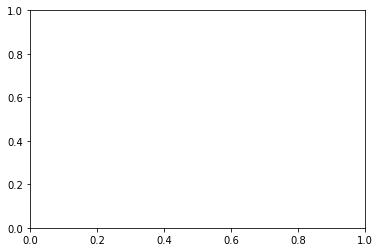

In [38]:
# 이제 그래프로 그려서 눈으로 확인해보자

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [39]:
# alpha 값을 0.1일때 가장 적절하므로 최종 모델을 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9889354346720892
0.9856564835209134


In [40]:
## 라쏘 회귀

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9865912554645588


In [41]:
# 테스트 점수 확인하기
print(lasso.score(test_scaled, test_target))

0.9846056618190413


In [42]:
# alpha 값을 바꾸어 가며 훈련세트와 테스트 점수를 계산

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  # 라쏘 모델을 만듦
  lasso =Lasso(alpha=alpha, max_iter=10000)
  #f 라쏘 모델을 훈련함
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장함
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled,test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24660.43863638939, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8738.521394202828, tolerance: 518.2793833333334
  positive)


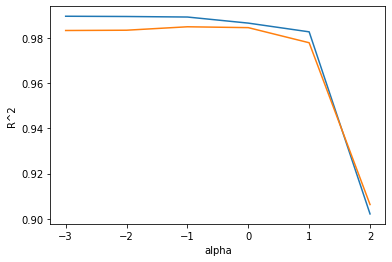

In [43]:
#그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))

0.9888067471131867
0.9824470598706695
40
